 # Final Project - Business Analysis For Entrepreneurs using Data Science

## Part 1 - Classification

### Research question

In this project we will focus on the issue of Credit Risk Analysis.

The research question is : "What are the key predictors of loan default among loan seekers and can these predictors be used to accurately predict the likelihood of default/non-default for new loan applicants"

As a bank/company that provides loans, it's important to conduct a thorough assessment of the borrower's creditworthiness, so that the lenders can determine the likelihood of the borrower defaulting on the loan. The lenders will look at the borrowers credit score, deafault history and other financial information. Based on this information, the lender can determine whether the borrower is likely to be able to make the required loan payments on time.

If a borrower is predicted to be a high risk for default, the lender may either deny the loan application or require the borrower to provide collateral to secure the loan. By taking these precautions, the lender can protect themselves from financial losses and ensure that they are able to recoup their investment. Overall, it is important for lenders to check if a borrower can return the loan to minimize the risk of default and protect their financial interests.

As there are many borrowers seeking for a loan, a problem arises regarding who is legible to recieve a loan from the lender.
The lender can use different surpervised algorithms, such that the algorithms predicts for a loan seeker, whether he is likely to rerurn the loan or default. Hence helping the lenders manage their risk of default as well. 

This can be done using Data Sceince, as the lenders keep track of their loans, they have a database that stores personal and financial information about the borrower and whether he returned the loan or defaulted. In this case the features would be personal and financial information of the borrower, and the target would be whether the borrower will return the loan or not.

Examples of early AI adoptions in credit risk management:

The U.S.-based FinTech startup ZestFinance showed tangible results in adopting AI for credit risk optimization. The company used the technology to reduce losses and default rates by 20%. 

Bank of England applied AI in credit risk management, specifically in the area of pricing and underwriting of insurance policies. The leaders within the institution imply that AI algorithms illustrate a level of sophistication that cannot be matched by traditional models. 

BlackRock, an American multinational investment management corporation, used AI for evaluating liquidity risks. The firm’s asset managers fed the AI algorithms with internal data and were able to accurately calculate the price tag of cost liquidating. In turn, it granted higher returns and lower risk.

The Data Set used in this project is from kaggle.com. 


## 1) EDA and Preprocessing

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model #regression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



In [2]:
# Importing the dataset
df = pd.read_csv('credit_risk_dataset.csv',header=0)
print(df.shape)
df.info()

(32581, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
cols_to_impute = ['person_emp_length','loan_int_rate']

# Method: mean imputer
# We use the mean imputer for the filling the missing values. For both columns taking the average of all observations will
# will give us will help prevent filling missing values with extreme values that may affect the models performance.

df1 = df.copy()
mean_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
df1[cols_to_impute] = mean_imputer.fit_transform(df1[cols_to_impute].values)
print("df1 info:\n")
df1
print("df1 null sum:\n",df1.isnull().sum(),'\n')



df1 info:

df1 null sum:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64 



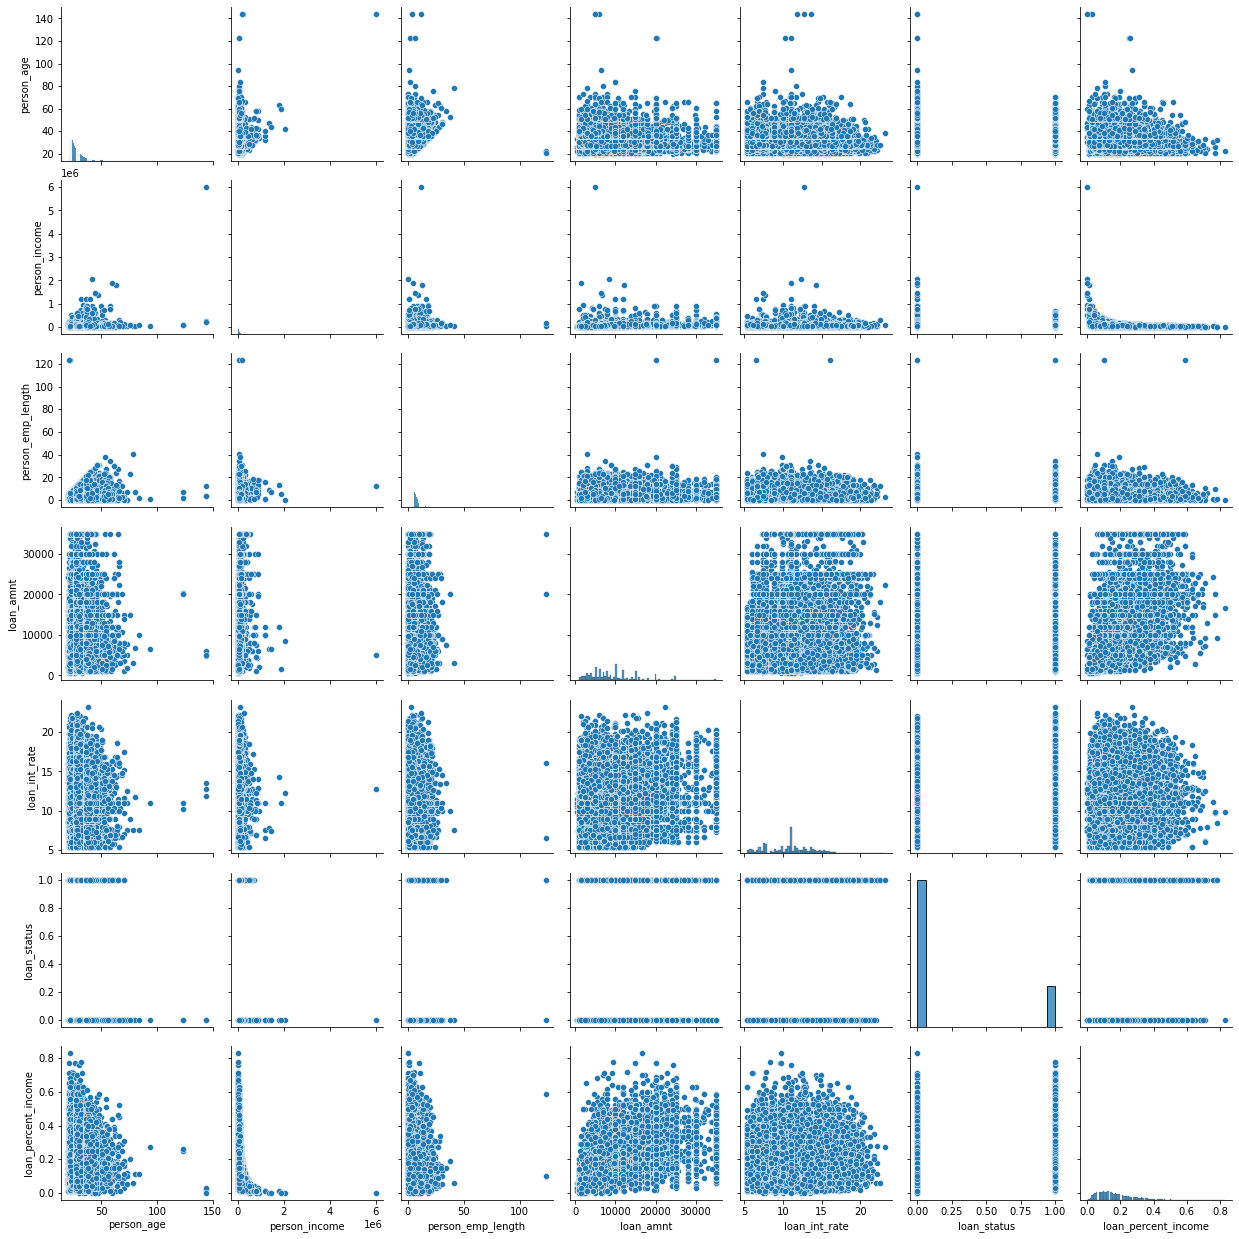

In [6]:
sns.pairplot(df1.iloc[:,:-1])

In [7]:
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


We can understnd from the figures above that there are a few outliers (such as the the age of 144 which doesn't make sense)  yet, other than that the data is  such as that the age of 144 that is the maximum. There aren't any hidden missing data.

In [8]:
df_copy = df1.copy()
df_copy.drop(columns=['person_home_ownership','loan_intent','loan_grade',
                      'cb_person_default_on_file'], axis =1, inplace =True) 
DF= df_copy
DF.info()
DF.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_emp_length           32581 non-null  float64
 3   loan_amnt                   32581 non-null  int64  
 4   loan_int_rate               32581 non-null  float64
 5   loan_status                 32581 non-null  int64  
 6   loan_percent_income         32581 non-null  float64
 7   cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.0 MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
5,21,9900,2.0,2500,7.14,1,0.25,2
6,26,77100,8.0,35000,12.42,1,0.45,3
7,24,78956,5.0,35000,11.11,1,0.44,4
8,24,83000,8.0,35000,8.90,1,0.42,2
9,21,10000,6.0,1600,14.74,1,0.16,3


We will check the heat map in order to check for features that have a corelation of above 85%

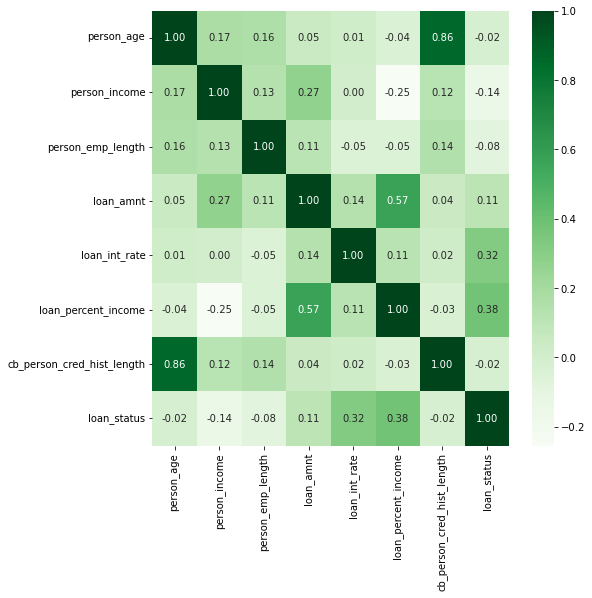

In [9]:
variables = ['person_age','person_income','person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
credit_risk_corr = DF[variables].corr()
credit_risk_corr
plt.figure(figsize=(8,8))
sns.heatmap(credit_risk_corr, cmap='Greens', annot=True, fmt='.2f')
plt.show()

We will remove the featuresthat have a correlation greater than 85%: 

In [10]:
# Select upper triangle of correlation matrix
upper = credit_risk_corr.where(np.triu(np.ones(credit_risk_corr.shape), k=1).astype(bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("To drop: ", to_drop)

# Drop the correlated columns
DF.drop(columns=to_drop, inplace=True)
DF.info()

To drop:  ['cb_person_cred_hist_length']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   person_age           32581 non-null  int64  
 1   person_income        32581 non-null  int64  
 2   person_emp_length    32581 non-null  float64
 3   loan_amnt            32581 non-null  int64  
 4   loan_int_rate        32581 non-null  float64
 5   loan_status          32581 non-null  int64  
 6   loan_percent_income  32581 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.7 MB


In [11]:
# Split to train and test:

Y1 = DF[['loan_status']]
X1 = DF.drop(['loan_status'], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

print("DF:")
print(DF.shape)
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)


DF:
(32581, 7)
(26064, 6)
(6517, 6)
(26064, 1)
(6517, 1)


In [12]:
# Scale the features using Standard Scaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

X1_train_scaled[:10]

array([[ 5.66851795e+00, -3.17176770e-01, -6.87840544e-01,
        -7.60188868e-01,  2.59596453e-02, -6.58438750e-01],
       [-2.76062335e-01, -6.31651512e-01, -1.18139371e+00,
        -1.74340949e-01,  1.77106557e+00,  1.49131123e+00],
       [-7.45371304e-01, -2.38558084e-01, -4.41063959e-01,
         1.01318862e+00,  6.83630162e-01,  1.30437645e+00],
       [-9.01807628e-01, -1.59876504e-01,  2.99265795e-01,
        -5.70184138e-01, -1.01915043e+00, -5.64971360e-01],
       [-5.88934981e-01,  2.01706555e-01, -4.41063959e-01,
        -4.11846862e-01,  4.98049868e-01, -7.51906141e-01],
       [-1.19626011e-01,  1.38811607e-01,  1.53314872e+00,
         6.31649636e-02,  4.65110370e-04, -3.78036579e-01],
       [-2.76062335e-01, -3.32900507e-01, -1.18139371e+00,
        -8.86858688e-01,  9.47349527e-01, -7.51906141e-01],
       [ 9.75428251e-01, -1.52810171e-02,  2.02670189e+00,
        -2.53509587e-01, -1.33170672e+00, -4.71503969e-01],
       [-9.01807628e-01, -4.74414141e-01, -9.346

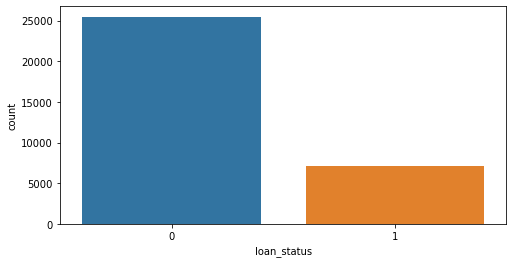

In [13]:
#Check the target to see if it is balanced:
DF.loan_status.value_counts()
plt.figure(figsize=(8,4))
sns.countplot(x='loan_status', data=DF)
plt.show()

The target categories are 0 for a non default loan and 1 for a loan that defaulted. clearly there are more instances that labeled as 0 then 1, therefore we can say that the traget variable is imbalanced.

## 2) Training models and Hyperparamater tuning

In [14]:
# Model 1 - KNN

model1 = KNeighborsClassifier()
param_grid1 = {'n_neighbors': range(3,80)}

# Use k-fold cross-validation to evaluate the models
kfold = KFold(n_splits=5)

# Optimize model1
grid_search_knn_1 = GridSearchCV(model1, param_grid1, cv=kfold, scoring='accuracy')
grid_search_knn_1.fit(X1_train_scaled, y1_train.values.ravel())
best_params_k1 = grid_search_knn_1.best_params_
best_score_k1 = grid_search_knn_1.best_score_



# Save the best hyperparameters
print("Best parameters for knn ", best_params_k1)
print("Best score for model1:", best_score_k1)


Best parameters for knn  {'n_neighbors': 19}
Best score for model1: 0.8458408041529095


In [15]:
# Model 2 - LR

model2 = LogisticRegression(max_iter= 2000)
param_grid2 = {'C': [0.00001, 0.001,0.01, 0.1, 1, 10, 100]}

# Optimize model2
grid_search_lr_1 = GridSearchCV(model2, param_grid2, cv=kfold, scoring='accuracy')
grid_search_lr_1.fit(X1_train_scaled, y1_train.values.ravel())
best_params_lr1 = grid_search_lr_1.best_params_
best_score_lr1 = grid_search_lr_1.best_score_

print("Best parameters for LR:", best_params_lr1)
print("Best score for model1:", best_score_lr1)

Best parameters for LR: {'C': 0.01}
Best score for model1: 0.8304171238472093


In [16]:
# Model 3 - XGBClassifier

model3_XGB = XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid3 = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 500, 1000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model3_XGB, param_grid3, cv=kfold, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X1_train_scaled, y1_train.values.ravel())

# Print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
Best score: 0.8779924929396797


## 3) Results analysis

0.8436397115237072


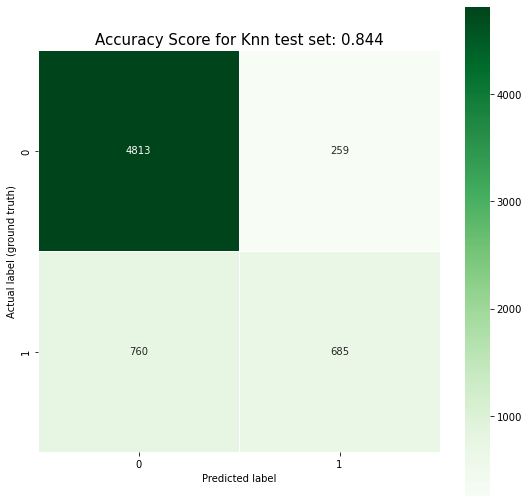

In [17]:
knn= KNeighborsClassifier(n_neighbors=19)
knn.fit(X1_train_scaled, y1_train.values.ravel())

predictions_knn = knn.predict(X1_test_scaled)

score_knn = knn.score(X1_test_scaled, y1_test.values.ravel())
print(score_knn)


cmk1 = metrics.confusion_matrix(y1_test.values.ravel(), predictions_knn)

plt.figure(figsize=(9,9))
sns.heatmap(cmk1, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label (ground truth)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Knn test set: {0:.3f}'.format(score_knn)
plt.title(all_sample_title, size = 15);
plt.savefig('KNN_Confusion.png')


0.8226177689120762


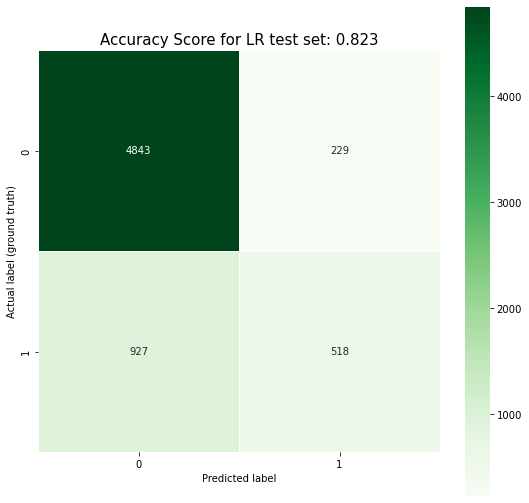

In [18]:
lr= LogisticRegression(C=0.01)
lr.fit(X1_train_scaled, y1_train.values.ravel())

predictions_lr = lr.predict(X1_test_scaled)

score_lr = lr.score(X1_test_scaled, y1_test.values.ravel())
print(score_lr)


cmk2 = metrics.confusion_matrix(y1_test.values.ravel(), predictions_lr)

plt.figure(figsize=(9,9))
sns.heatmap(cmk2, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label (ground truth)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for LR test set: {0:.3f}'.format(score_lr)
plt.title(all_sample_title, size = 15);
plt.savefig('Logistic_Regression_Confusion.png')

0.8362743593678073


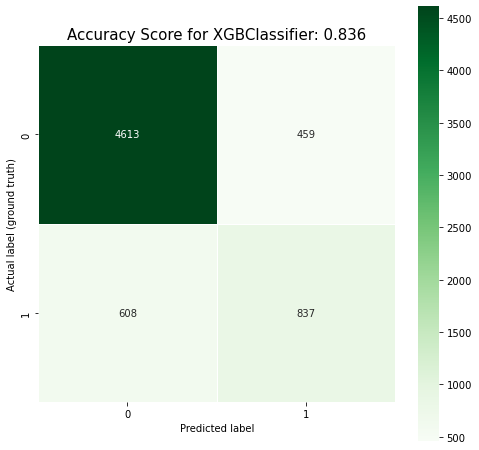

In [19]:
xgb= XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators = 500)
xgb.fit(X1_train_scaled, y1_train.values.ravel())

predictions_xgb = xgb.predict(X1_test_scaled)

score_xgb = xgb.score(X1_test_scaled, y1_test.values.ravel())
print(score_xgb)


cmk3 = metrics.confusion_matrix(y1_test.values.ravel(), predictions_xgb)

plt.figure(figsize=(8,8))
sns.heatmap(cmk3, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label (ground truth)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for XGBClassifier: {0:.3f}'.format(score_xgb)
plt.title(all_sample_title, size = 15);
plt.savefig('XGBClassifier_Confusion.png')

In [20]:
# Predictions for trinig set
predictions_knn_train = knn.predict(X1_train_scaled)
predictions_LR_train = lr.predict(X1_train_scaled)
predictions_XGB_train = xgb.predict(X1_train_scaled)

In [21]:
print("Train matrix - KNN:\n" ,classification_report(y1_train,predictions_knn_train))
print("Test matrix - KNN:\n" ,classification_report(y1_test,predictions_knn))

print("Train matrix - LR:\n" ,classification_report(y1_train,predictions_LR_train))
print("Test matrix - LR:\n" ,classification_report(y1_test,predictions_lr))

print("Train matrix - XGB:\n" ,classification_report(y1_train,predictions_XGB_train))
print("Test matrix - XGB:\n" ,classification_report(y1_test,predictions_xgb))

Train matrix - KNN:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     20401
           1       0.76      0.51      0.61      5663

    accuracy                           0.86     26064
   macro avg       0.82      0.73      0.76     26064
weighted avg       0.85      0.86      0.85     26064

Test matrix - KNN:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.73      0.47      0.57      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.71      0.74      6517
weighted avg       0.83      0.84      0.83      6517

Train matrix - LR:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     20401
           1       0.70      0.38      0.50      5663

    accuracy                           0.83     26064
   macro avg       0.77      0.67      0.70     26064
weighted avg 

As a bank that provides loans we are most intrested in finding the people who won't be able to return the loan they ask for. Recall is calculated by TP/(TP+FN). So we choose Recall to be the model metric that suits us best when there is a high cost associated with False Negative. In our case false negative is when a person cannot return a loan he recieved and is predicted as though he can. This is the exact case that the bank is trying to identify in advance and prevent, therfore we choose the model with the highest recall score for the category 1 in the target (meaning default) - XGBClassifier.

In conclusion, A bank/lender can increase it's revenue and minimize default risk by using the above algorithms to predict whether a new loan applicant is more likely to default ot not.

# Part 2 - Regression

In the second part of our project we will use the same dataset that we used for the classification problem in part 1. The research question for the Regression Part is :

"How can banks determine the optimal interest rate for a loan that balances profitability with customer satisfaction and credit risk?"

Banks face competing priorities when setting interest rates for loans. On one hand, banks want to earn a profit and generate a return on their investment. On the other hand, they need to ensure that the interest rate is reasonable and competitive to attract and retain customers. Additionally, banks must consider the credit risk associated with the loan and set an interest rate that appropriately reflects that risk.

In the original data set there is a column named 'loan_int' (values represnt the loan's intrest rate) which will become our target. The values are continuous as intrest rate varies from loan to loan. The explaining features will be the other non categorial features in the original data

## 4) Regression preprocessing

In [22]:
# Create new DF and target, We also remove now the 'loan_status' which is a categorial feature now.
# We removed in the previous section all correlated features and categorial columns

df_reg = X1_train_scaled
Y2 = DF[['loan_int_rate']]
X2 = DF.drop(['loan_int_rate', 'loan_status'], axis=1)

# Split to train and test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [23]:
Y2.head(5)

,loan_int_rate
0,16.02
1,11.14
2,12.87
3,15.23
4,14.27


In [24]:
X2.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income
0,22,59000,123.0,35000,0.59
1,21,9600,5.0,1000,0.10
2,25,9600,1.0,5500,0.57
3,23,65500,4.0,35000,0.53
4,24,54400,8.0,35000,0.55
5,21,9900,2.0,2500,0.25
6,26,77100,8.0,35000,0.45
7,24,78956,5.0,35000,0.44
8,24,83000,8.0,35000,0.42
9,21,10000,6.0,1600,0.16


In [25]:
X2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,0.170203
std,6.348078,6.198312e+04,4.085333,6322.086646,0.106782
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.150000
75%,30.000000,7.920000e+04,7.000000,12200.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,0.830000


In [26]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   person_age           32581 non-null  int64  
 1   person_income        32581 non-null  int64  
 2   person_emp_length    32581 non-null  float64
 3   loan_amnt            32581 non-null  int64  
 4   loan_percent_income  32581 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 1.2 MB


In [27]:
# Scale the features using Standard Scaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

X2_train_scaled[:10]

array([[ 5.66851795, -0.31717677, -0.68784054, -0.76018887, -0.65843875],
       [-0.27606233, -0.63165151, -1.18139371, -0.17434095,  1.49131123],
       [-0.7453713 , -0.23855808, -0.44106396,  1.01318862,  1.30437645],
       [-0.90180763, -0.1598765 ,  0.2992658 , -0.57018414, -0.56497136],
       [-0.58893498,  0.20170655, -0.44106396, -0.41184686, -0.75190614],
       [-0.11962601,  0.13881161,  1.53314872,  0.06316496, -0.37803658],
       [-0.27606233, -0.33290051, -1.18139371, -0.88685869, -0.75190614],
       [ 0.97542825, -0.01528102,  2.02670189, -0.25350959, -0.47150397],
       [-0.90180763, -0.47441414, -0.93461713, -0.72852141, -0.28456919],
       [ 1.75760987,  0.21743029,  3.26058481, -0.63351905, -0.93884092]])

## 5) Training Linear Models

In [28]:
# define helper function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# TRAIN MODEL using sklearn linearRegression
lin_model = LinearRegression()
lin_model.fit(X2_train_scaled,y2_train)


# model evaluation for linear model:
y_train_predict = lin_model.predict(X2_train_scaled)
Lin_r2=r2_score(y2_train, y_train_predict)
RMSE = (np.sqrt(mean_squared_error(y2_train, y_train_predict)))
MAE=mean_absolute_error(y2_train, y_train_predict)
MAPE=mean_absolute_percentage_error(y2_train, y_train_predict)
print("Linear regression model performance on train set:")
print("--------------------------------------")
print('r2 is {}'.format(Lin_r2))
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

# model evaluation for linear model:
y_test_predict = lin_model.predict(X2_test_scaled)
Lin_r2_test=r2_score(y2_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y2_test, y_test_predict)))
MAE=mean_absolute_error(y2_test, y_test_predict)
MAPE=mean_absolute_percentage_error(y2_test, y_test_predict)
print("Linear regression model performance on test set:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print('r2 is {}'.format(Lin_r2_test))
print("\n")

Linear regression model performance on train set:
--------------------------------------
r2 is 0.025484375551300342
RMSE is 3.0320572694478827
MAE score is 2.4393316779462184
MAPE score is loan_int_rate    25.295344
dtype: float64


Linear regression model performance on test set:
--------------------------------------
RMSE is 3.078426246076369
MAE score is 2.4737719722928695
MAPE score is loan_int_rate    25.688705
dtype: float64
r2 is 0.027506772812868507




In [29]:
# Define the polynomial degrees to test
degrees = [ 2, 3, 4]

# Loop over the degrees and compute the RMSE for each one using cross-validation
rmse_scores = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X2_train_scaled)
    lin_reg = LinearRegression()
    rmse_scores.append(-1 * cross_val_score(lin_reg, X_poly, y2_train, cv=5, scoring='neg_root_mean_squared_error').mean())

# Print the RMSE scores for each degree
print('RMSE scores:', rmse_scores)

# Find the best degree (i.e., the one with the lowest RMSE)
best_degree = degrees[np.argmin(rmse_scores)]
print('Best degree:', best_degree)

RMSE scores: [3.0168542977839303, 4.072774497397939, 51.113892288919196]
Best degree: 2


In [30]:
# Create polynomial features of best degree
poly2 = PolynomialFeatures(degree=2)
X2_poly2 = poly2.fit_transform(X2_train_scaled)
X2_poly2_test = poly2.fit_transform(X2_test_scaled)

# Train a linear regression model on the polynomial features
lr_p2 = LinearRegression()
lr_p2.fit(X2_poly2, y2_train)

# model evaluation for poly deg 2 model:
y_train_predict_poly = lr_p2.predict(X2_poly2)
Lin_r2=r2_score(y2_train, y_train_predict_poly)
RMSE = (np.sqrt(mean_squared_error(y2_train, y_train_predict_poly)))
MAE=mean_absolute_error(y2_train, y_train_predict)
MAPE=mean_absolute_percentage_error(y2_train, y_train_predict_poly)
print("Linear regression model performance on train set, after polynomial transformation of degree 2:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

# model evaluation for linear model:
y_test_predict_poly = lr_p2.predict(X2_poly2_test)
Lin_r2=r2_score(y2_test, y_test_predict_poly)
RMSE = (np.sqrt(mean_squared_error(y2_test, y_test_predict_poly)))
MAE=mean_absolute_error(y2_test, y_test_predict_poly)
MAPE=mean_absolute_percentage_error(y2_test, y_test_predict_poly)
print("Linear regression model performance on test set, after polynomial transformation of degree 2:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

Linear regression model performance on train set, after polynomial transformation of degree 2:
--------------------------------------
RMSE is 3.006176512014037
MAE score is 2.4393316779462184
MAPE score is loan_int_rate    25.101205
dtype: float64


Linear regression model performance on test set, after polynomial transformation of degree 2:
--------------------------------------
RMSE is 3.148412522817892
MAE score is 2.546971975095885
MAPE score is loan_int_rate    26.60436
dtype: float64




We are looking to determine the intrest rate for a loan based on different financial information about the borrower. We need to penalize large errors, since we don't want to give people extremley high (high intrest rate may cause the loan seeker to look at competitors offers that may give him lower intrest rate) or low intrest rate (low intrest rate will reduce the company's revenue and increase their risk), therfore RMSE is the chosen accuracy metric for this specific dataset. In our case both The RMSE and MAE of the model that was trained on the original data (no poly transformation) is lower, therefore we'll choose it as the better model according to the logic explained above.

## 6) XGBRegressor and KNeighborsRegressor

In [31]:
# Define the parameter grid for XGBRegressor
xgb_params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'learning_rate': [ 1 ,0.1, 0.01,]}

# Create the XGBRegressor model
xgb_r = XGBRegressor()

# Use GridSearchCV to search for the best hyperparameters
xgb_cv = GridSearchCV(xgb_r, xgb_params, cv=5)

# Fit 
xgb_cv.fit(X2_train_scaled, y2_train)

# Print the best hyperparameters
print('Best hyperparameters for XGBRegressor:', xgb_cv.best_params_)


Best hyperparameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [32]:
# Define the parameter grid for KNNRegressor    
knn_params = {'n_neighbors':range(600,1600,50),
              'weights': ['uniform', 'distance']}

# Create the XGBRegressor and KNNRegressor models
knn_r = KNeighborsRegressor()

# Use GridSearchCV to search for the best hyperparameters
knn_cv = GridSearchCV(knn_r, knn_params, cv=5)

# Fit 
knn_cv.fit(X2_train_scaled, y2_train)

# Print the best hyperparameters
print('Best hyperparameters for KNNRegressor:', knn_cv.best_params_)


Best hyperparameters for KNNRegressor: {'n_neighbors': 850, 'weights': 'distance'}


In [33]:
# TRAIN MODEL 
xgbr = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators =  200)
xgbr.fit(X2_train_scaled,y2_train)


# model evaluation for XGBRegressor model - train:
y_train_predict_xgbr = xgbr.predict(X2_train_scaled)
y_train_predict_xgbr = y_train_predict_xgbr.reshape(y_train_predict_xgbr.shape[0],1)
r2_xgbr = r2_score(y2_train, y_train_predict_xgbr)
RMSE = (np.sqrt(mean_squared_error(y2_train, y_train_predict_xgbr)))
MAE=mean_absolute_error(y2_train, y_train_predict_xgbr)
MAPE=mean_absolute_percentage_error(y2_train, y_train_predict_xgbr)
print("XGBRegressor model performance on train set:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print('r2 score is {}'.format(r2_xgbr))
print("\n")

# model evaluation for XGBRegressor model - test:
y_test_predict_xgbr = xgbr.predict(X2_test_scaled)
y_test_predict_xgbr = y_test_predict_xgbr.reshape(y_test_predict_xgbr.shape[0],1)
r2_xgbr_test = r2_score(y2_test, y_test_predict_xgbr)
RMSE = (np.sqrt(mean_squared_error(y2_test, y_test_predict_xgbr)))
MAE=mean_absolute_error(y2_test, y_test_predict_xgbr)
MAPE=mean_absolute_percentage_error(y2_test, y_test_predict_xgbr)
print("XGBRegressor model performance on test set:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print('r2 score is {}'.format(r2_xgbr_test))
print("\n")

XGBRegressor model performance on train set:
--------------------------------------
RMSE is 2.813671842159921
MAE score is 2.2730858657113147
MAPE score is loan_int_rate    23.53147
dtype: float64
r2 score is 0.16080884962034592


XGBRegressor model performance on test set:
--------------------------------------
RMSE is 3.077581497880054
MAE score is 2.4921418183626773
MAPE score is loan_int_rate    25.748597
dtype: float64
r2 score is 0.02804042157932396




In [34]:
# TRAIN MODEL
knr = KNeighborsRegressor(n_neighbors = 850, weights = 'distance')
knr.fit(X2_train_scaled,y2_train)


# model evaluation for KNegressor model - train:
y_train_predict_knr = knr.predict(X2_train_scaled)
RMSE = (np.sqrt(mean_squared_error(y2_train, y_train_predict_knr)))
MAE=mean_absolute_error(y2_train, y_train_predict_knr)
MAPE=mean_absolute_percentage_error(y2_train, y_train_predict_knr)
print("KNeighborsRegressor model performance on train set:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

# model evaluation for KNRegressor model - test:
y_test_predict_knr = knr.predict(X2_test_scaled)
RMSE = (np.sqrt(mean_squared_error(y2_test, y_test_predict_knr)))
r2_knr_test = r2_score(y2_test, y_test_predict_knr)

MAE=mean_absolute_error(y2_test, y_test_predict_knr)
MAPE=mean_absolute_percentage_error(y2_test, y_test_predict_knr)
print("KNeighborsRegressor model performance on test set:")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE))
print("\n")

KNeighborsRegressor model performance on train set:
--------------------------------------
RMSE is 0.4889037837181562
MAE score is 0.0874688891839255
MAPE score is loan_int_rate    0.910521
dtype: float64


KNeighborsRegressor model performance on test set:
--------------------------------------
RMSE is 3.055409252213645
MAE score is 2.461877296350257
MAPE score is loan_int_rate    25.46517
dtype: float64




## 7) Results Analysis